In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("StudentsPerformance.csv")

In [7]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
537,female,group D,high school,standard,none,51,66,62
759,male,group B,some college,standard,completed,69,77,77
402,female,group A,some college,free/reduced,none,49,65,55
508,male,group C,master's degree,standard,none,79,78,77
44,female,group E,associate's degree,free/reduced,none,50,56,54


In [8]:
df.shape

(1000, 8)

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
## checknig for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
## checking for duplicated values
df.duplicated().sum()

0

<Axes: xlabel='gender', ylabel='count'>

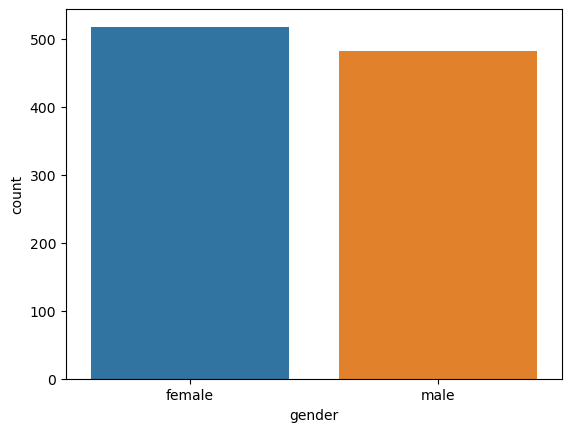

In [14]:
sns.countplot(x ='gender', data = df)

<Axes: ylabel='count'>

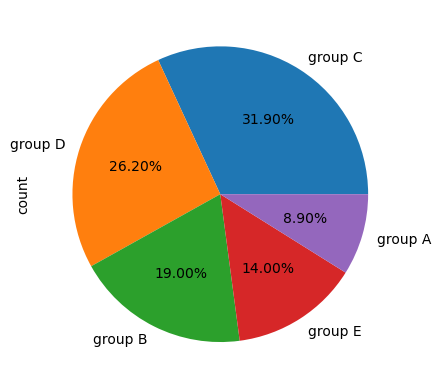

In [15]:
df.value_counts('race/ethnicity').plot(kind='pie',autopct='%.2f%%')

<Axes: xlabel='test preparation course', ylabel='count'>

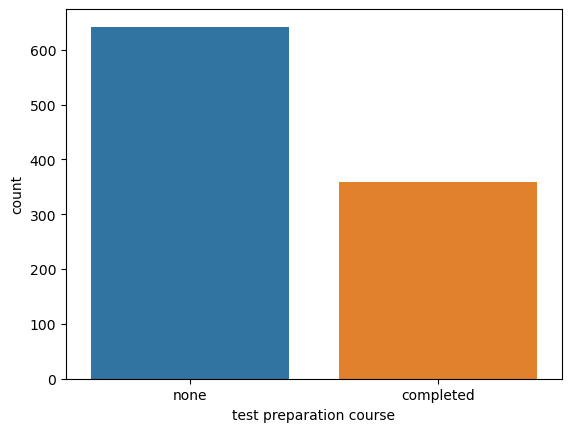

In [16]:
sns.countplot(x='test preparation course',data=df)


<Axes: xlabel='math score'>

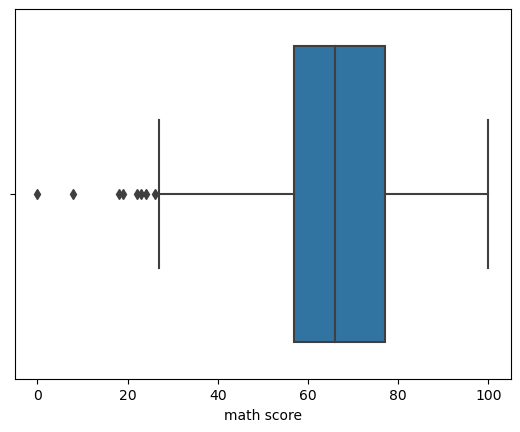

In [17]:
sns.boxplot(x='math score',data=df)

# Data Preprocessing

In [18]:
df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [20]:
encoders = {}
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

In [21]:
## label encoding
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

In [22]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
430,1,2,0,0,1,64,66,59
445,0,2,5,1,0,67,74,77
205,1,3,5,1,0,74,71,78
49,1,2,2,1,0,82,84,82
371,0,2,4,0,0,45,73,70


In [23]:
X = df.drop(['math_score','race_ethnicity','lunch'], axis=1)
y = df['math_score']

In [24]:
## splitting the data

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

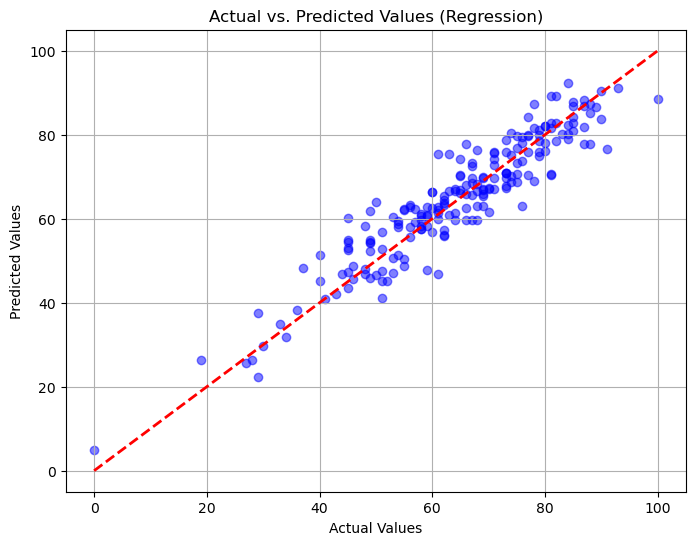

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Regression)')
plt.grid(True)
plt.show()

In [28]:
import pickle

# Specify the path where you want to save the model
model_file_path = 'linear_model.pkl'

# Open a file to store the model
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

In [29]:
with open(model_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [30]:
new_data = pd.DataFrame({
    'gender': [1, 1, 1, 1],  # Example values for gender
    'parental_level_of_education': [0, 4, 5, 4],  # Example values for parental level of education
    'test_preparation_course': [0, 1, 1, 1],  # Example values for test preparation course
    'reading_score': [84, 61, 46, 41],  # Example values for reading score
    'writing_score': [85, 57, 43, 42]  # Example values for writing score
})

In [31]:
predictions = loaded_model.predict(new_data)

# Print or use the predictions as needed
print(predictions)

[86.88245061 64.43730224 50.35928239 48.08956494]


In [32]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Student': range(1, len(predictions) + 1),  # Assuming one prediction per student
    'Prediction': predictions
})

# Print or use predictions DataFrame as needed
print(predictions_df)


   Student  Prediction
0        1   86.882451
1        2   64.437302
2        3   50.359282
3        4   48.089565


In [39]:
model.score(X_test,y_test)

0.8730141144516168

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.390402630480372
Mean Squared Error (MSE): 30.900542211926695
R-squared (R²): 0.8730141144516168
